#Exploratory Data Analysis for EMO Shared Task, WASSA 2023

In [ ]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
import spacy

#settings
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
stop_words = list(set(stopwords.words('english')))
sns.set_style('whitegrid')

In [ ]:
#get training and development data
train_data =pd.read_csv('/content/WASSA23_essay_level_with_labels_train.tsv', sep="\t")
train_data = train_data[['emotion', 'essay']]
dev_data = pd.read_csv("WASSA23_essay_level_dev.tsv", sep="\t")
df = pd.read_csv('/content/goldstandard_dev.tsv', sep="\t", names=['1', '2', 'emotion',1,2,3,4,5,6,7,8,9])
dev_data['emotion'] = df['emotion']
dev_data = dev_data[['emotion', 'essay']]

##Number of essays per emotion

<Axes: title={'center': 'Number of essays per emotion for training data'}, xlabel='Emotion', ylabel='Number of essays'>

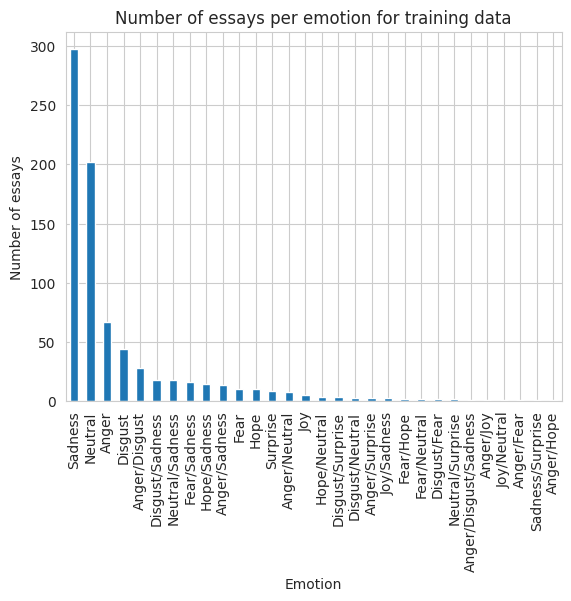

In [ ]:
#plot a bar chart of number of essays per emotion for training data
train_data['emotion'].value_counts().plot(kind='bar', title='Number of essays per emotion for training data', xlabel='Emotion', ylabel='Number of essays')

<Axes: title={'center': 'Number of essays per emotion for development data'}, xlabel='Emotion', ylabel='Number of essays'>

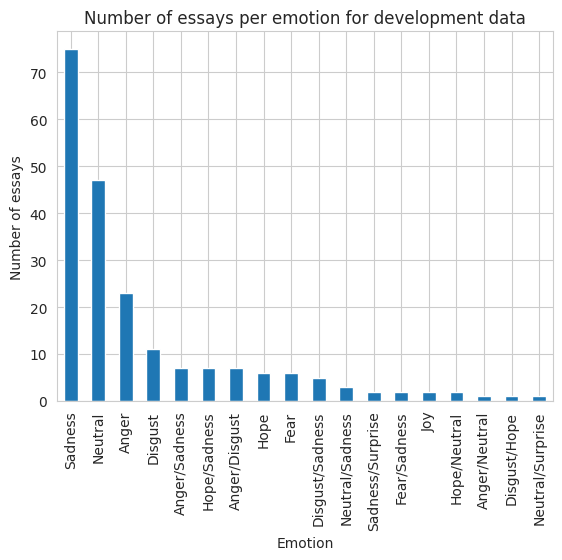

In [ ]:
#plot a bar chart of number of essays per emotion for development data
dev_data['emotion'].value_counts().plot(kind='bar', title='Number of essays per emotion for development data', xlabel='Emotion', ylabel='Number of essays')

## How many essays have multiple emotions?

<Axes: title={'center': 'Number of essays with multiple emotions (training data)'}, xlabel='Multiple emotions', ylabel='Number of essays'>

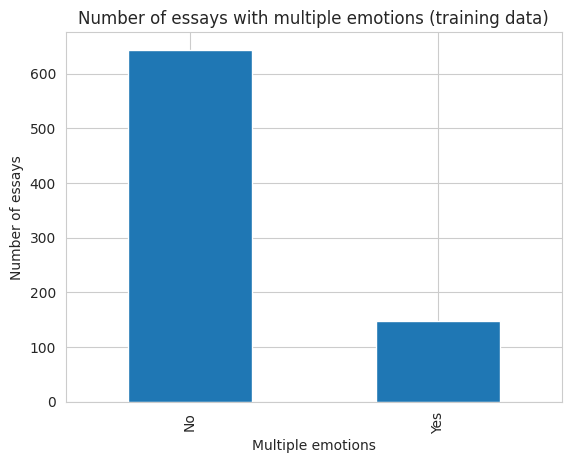

In [ ]:
#apply a function that checks if multiple emotions exist to each row
train_data['multiple_emotions'] = train_data['emotion'].apply(lambda x: "Yes" if len(x.split("/")) > 1 else "No")

#plot
train_data['multiple_emotions'].value_counts().plot(kind='bar', title='Number of essays with multiple emotions (training data)', xlabel='Multiple emotions', ylabel='Number of essays')

<Axes: title={'center': 'Number of essays with multiple emotions (development data)'}, xlabel='Multiple emotions', ylabel='Number of essays'>

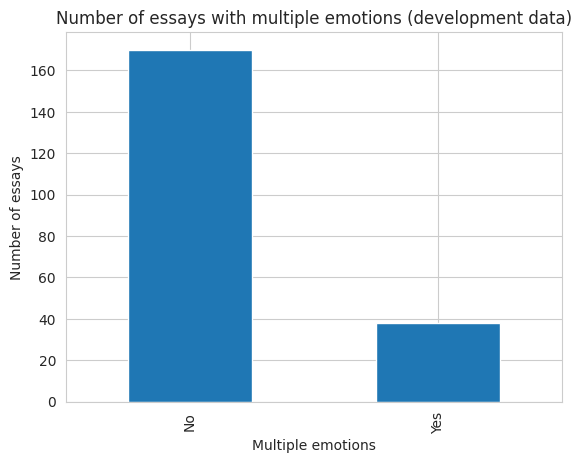

In [ ]:
#apply a function that checks if multiple emotions exist to each row
dev_data['multiple_emotions'] = dev_data['emotion'].apply(lambda x: "Yes" if len(x.split("/")) > 1 else "No")

#plot
dev_data['multiple_emotions'].value_counts().plot(kind='bar', title='Number of essays with multiple emotions (development data)', xlabel='Multiple emotions', ylabel='Number of essays')

## Number of words in each essay

<ipython-input-99-d8a4385dedf9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['essay_word_count'], kde=False, bins=50)


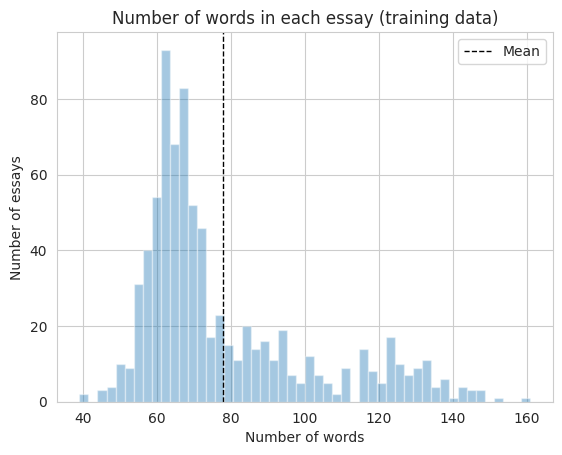

In [ ]:
#get word count for each essay
train_data['essay_word_count'] = train_data['essay'].apply(lambda x: len(x.split()))

#plot a histogram
sns.distplot(train_data['essay_word_count'], kde=False, bins=50)

#add a vertical line to the plot to show the mean
plt.axvline(train_data['essay_word_count'].mean(), color='k', linestyle='dashed', linewidth=1)

#add title and labels
plt.title('Number of words in each essay (training data)')
plt.xlabel('Number of words')
plt.ylabel('Number of essays')

#add legend
plt.legend({'Mean':train_data['essay_word_count'].mean()})

<ipython-input-100-cb0d71d3114a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dev_data['essay_word_count'], kde=False, bins=50)


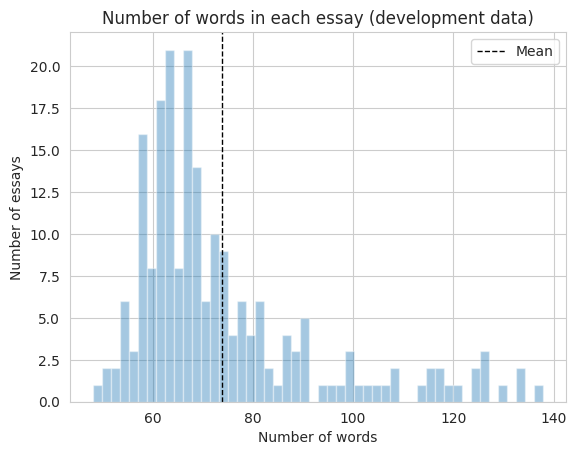

In [ ]:
#get word count for each essay
dev_data['essay_word_count'] = dev_data['essay'].apply(lambda x: len(x.split()))

#plot a histogram
sns.distplot(dev_data['essay_word_count'], kde=False, bins=50)

#add a vertical line to the plot to show the mean
plt.axvline(dev_data['essay_word_count'].mean(), color='k', linestyle='dashed', linewidth=1)

#add title and labels
plt.title('Number of words in each essay (development data)')
plt.xlabel('Number of words')
plt.ylabel('Number of essays')

#add legend
plt.legend({'Mean':dev_data['essay_word_count'].mean()})

## Words with highest frequency

In [ ]:

#create a function to get top n words
def get_top_n_words(corpus, n=None, remove_stopwords=True, verb_only=False, obj_only= False):
    '''
    List the top n words in a vocabulary according to occurrence in a text corpus.
    '''

    #error handling
    if verb_only and obj_only:
        print("Both verb_only and obj_only cannot be true, setting verb_only to False")
        verb_only=False
    
    #remove stopwords
    if remove_stopwords:

        #get only the verbs using spacy
        if verb_only:
            vec = CountVectorizer(tokenizer=lambda doc: [token.lemma_ for token in nlp(doc) if token.pos_ == "VERB"], stop_words=stop_words).fit(corpus)
        
        #get only objects using spacy
        elif obj_only:  
            vec = CountVectorizer(tokenizer=lambda doc: [token.lemma_ for token in nlp(doc) if token.dep_ == "dobj"], stop_words=stop_words).fit(corpus)
        
        #keep all the remaining words
        else: 
            vec = CountVectorizer(stop_words=stop_words).fit(corpus)
    
    #don't remove stopwords
    else:

        #get only the verbs using spacy
        if verb_only:
            vec = CountVectorizer(tokenizer=lambda doc: [token.lemma_ for token in nlp(doc) if token.pos_ == "VERB"], stop_words=stop_words).fit(corpus)
        
        #get only the objects using spacy
        elif obj_only:
            vec = CountVectorizer(tokenizer=lambda doc: [token.lemma_ for token in nlp(doc) if token.dep_ == "dobj"]).fit(corpus)
        
        #keep all words
        else:
            vec = CountVectorizer().fit(corpus)
    
    #create bag of words
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    
    #create a list of frequency of each words
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec.vocabulary_.items()]
    
    #sort
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    
    #return
    return words_freq[:n]

Text(0, 0.5, 'Frequency')

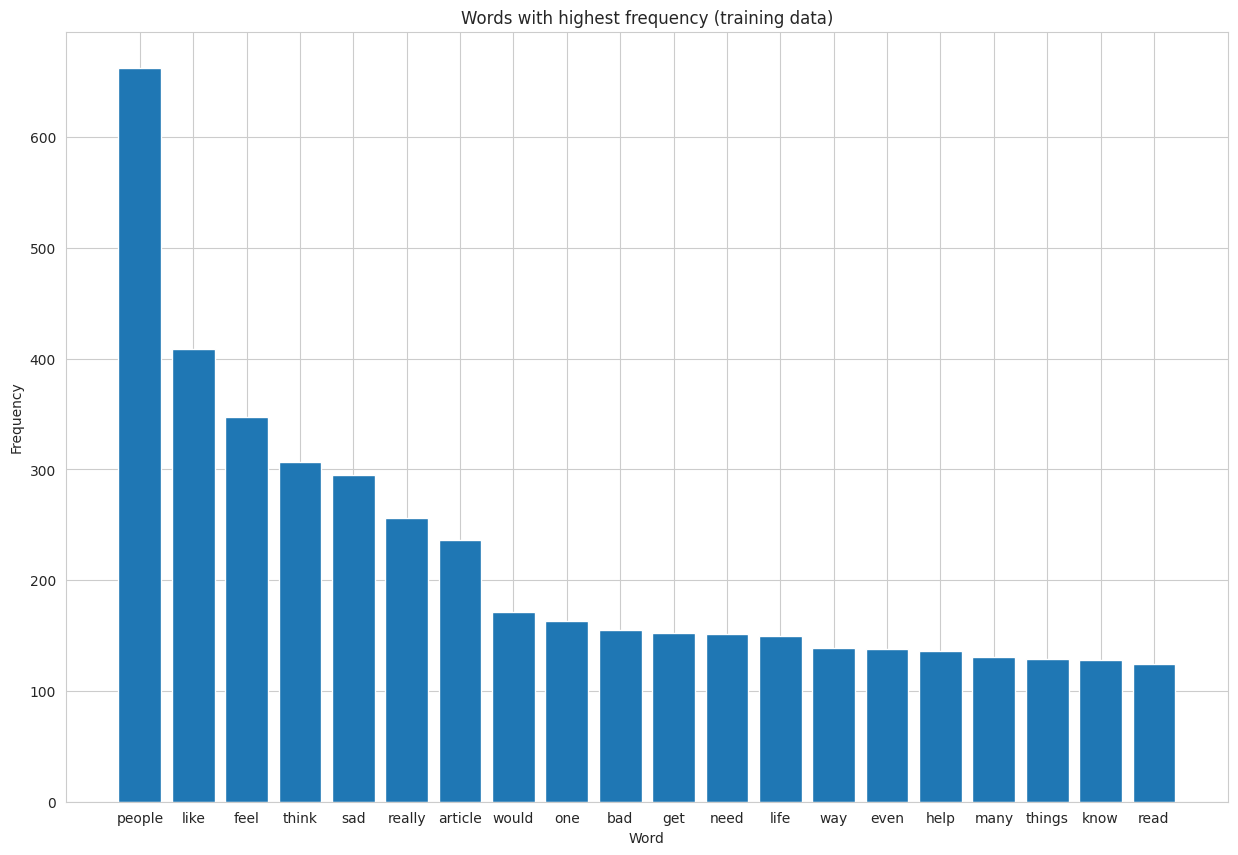

In [ ]:
#get top n words
top_words = get_top_n_words(train_data['essay'], n=20)
x,y = map(list, zip(*top_words))


#plot
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.title('Words with highest frequency (training data)')
plt.xlabel('Word')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

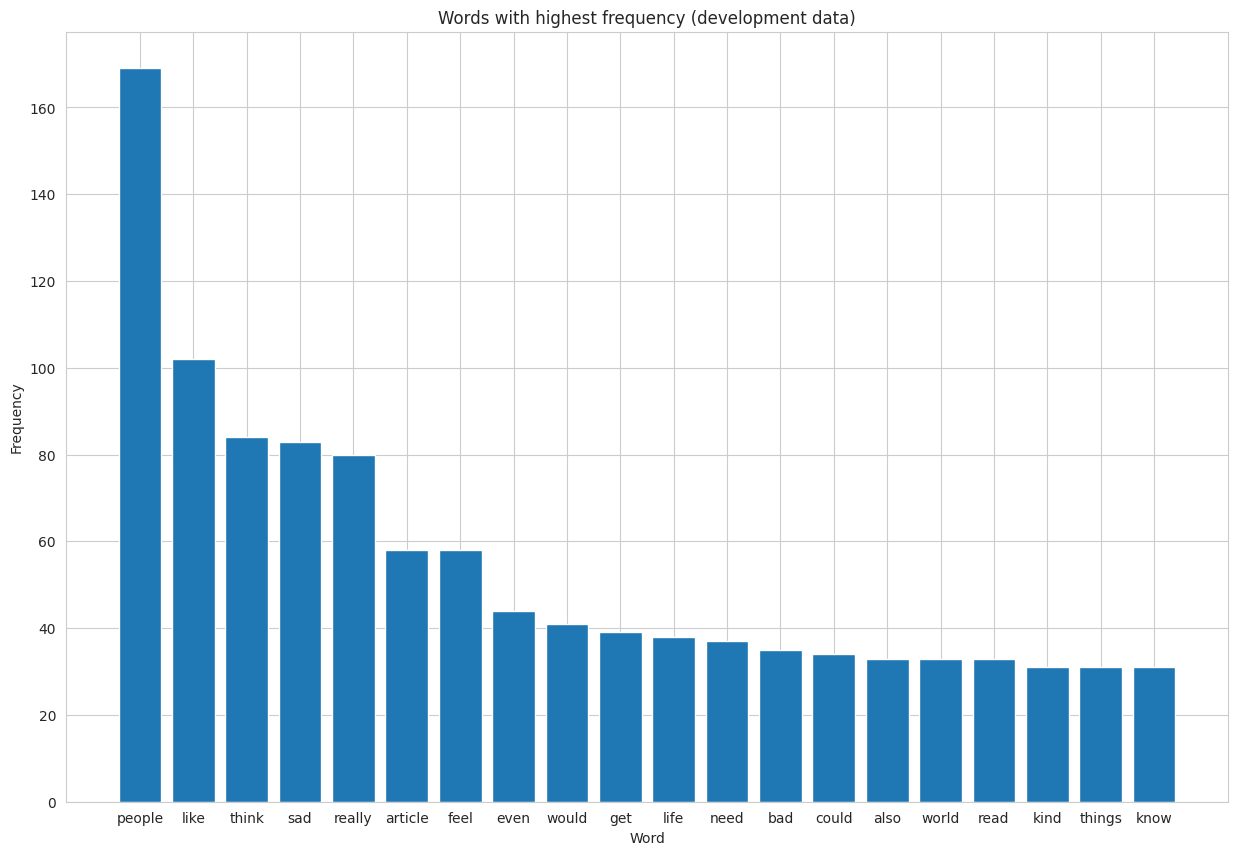

In [ ]:
#get top n words
top_words = get_top_n_words(dev_data['essay'], n=20)
x,y = map(list, zip(*top_words))

#plot
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.title('Words with highest frequency (development data)')
plt.xlabel('Word')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

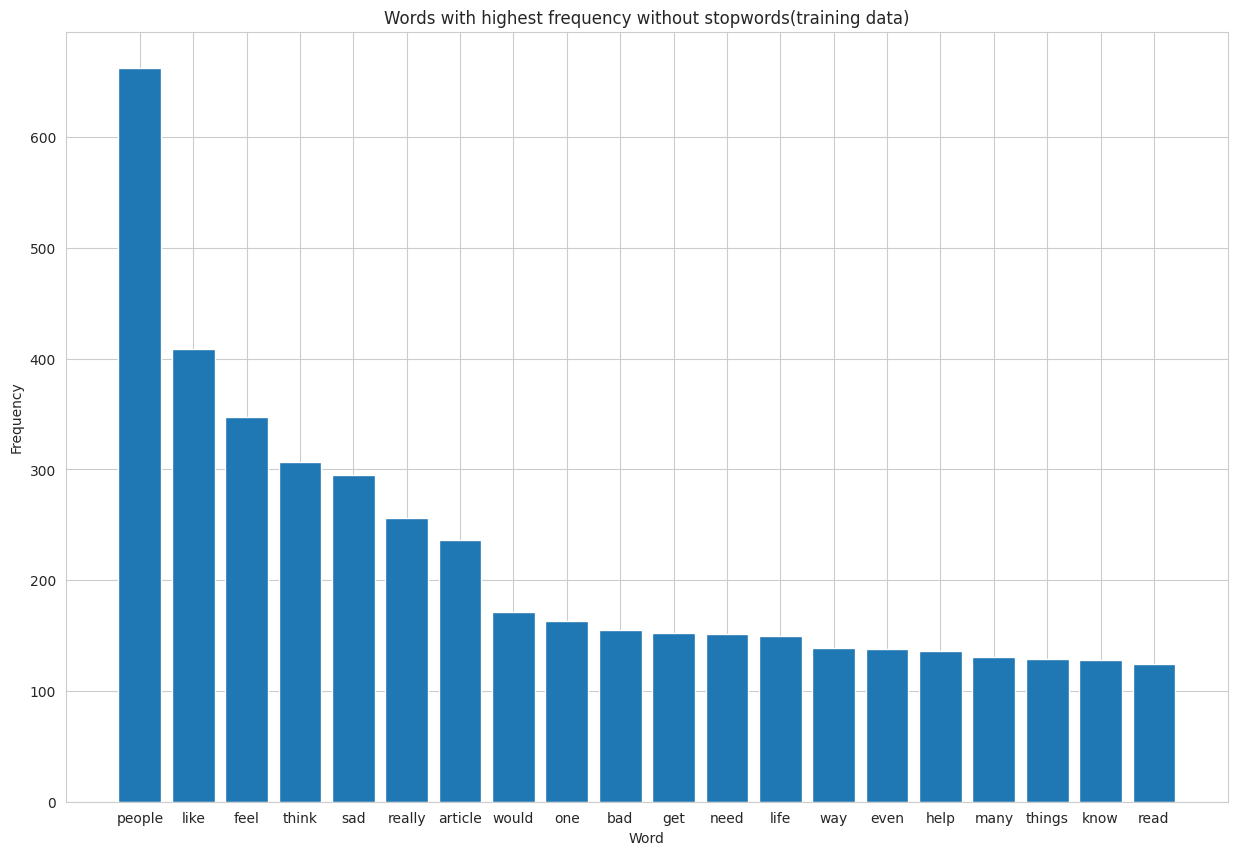

In [ ]:
#removing stopwords
top_words = get_top_n_words(train_data['essay'], n=20, remove_stopwords=True)
x,y = map(list, zip(*top_words))

plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.title('Words with highest frequency without stopwords(training data)')
plt.xlabel('Word')
plt.ylabel('Frequency')


Text(0, 0.5, 'Frequency')

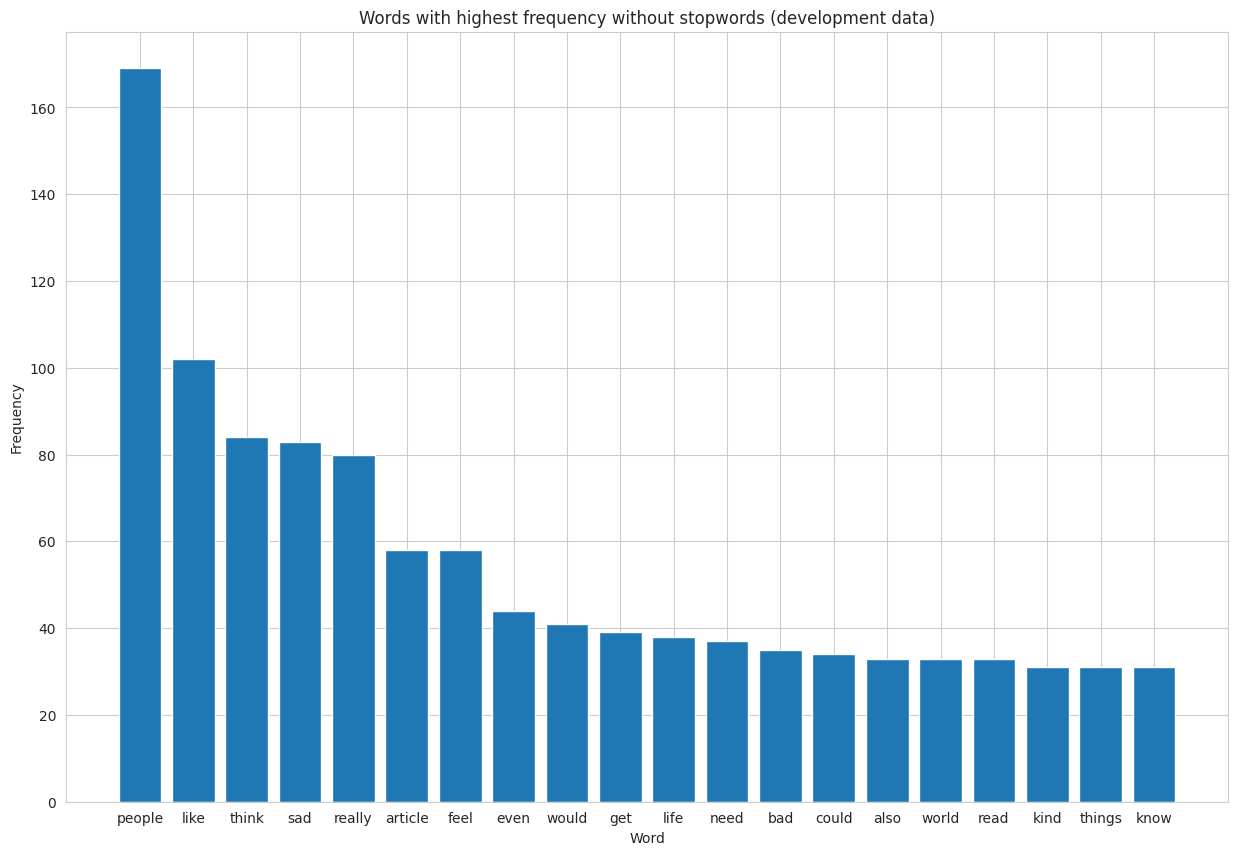

In [ ]:
#removing stopwords, dev data
top_words = get_top_n_words(dev_data['essay'], n=20, remove_stopwords=True)
x,y = map(list, zip(*top_words))

plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.title('Words with highest frequency without stopwords (development data)')
plt.xlabel('Word')
plt.ylabel('Frequency')


## Top words per emotion

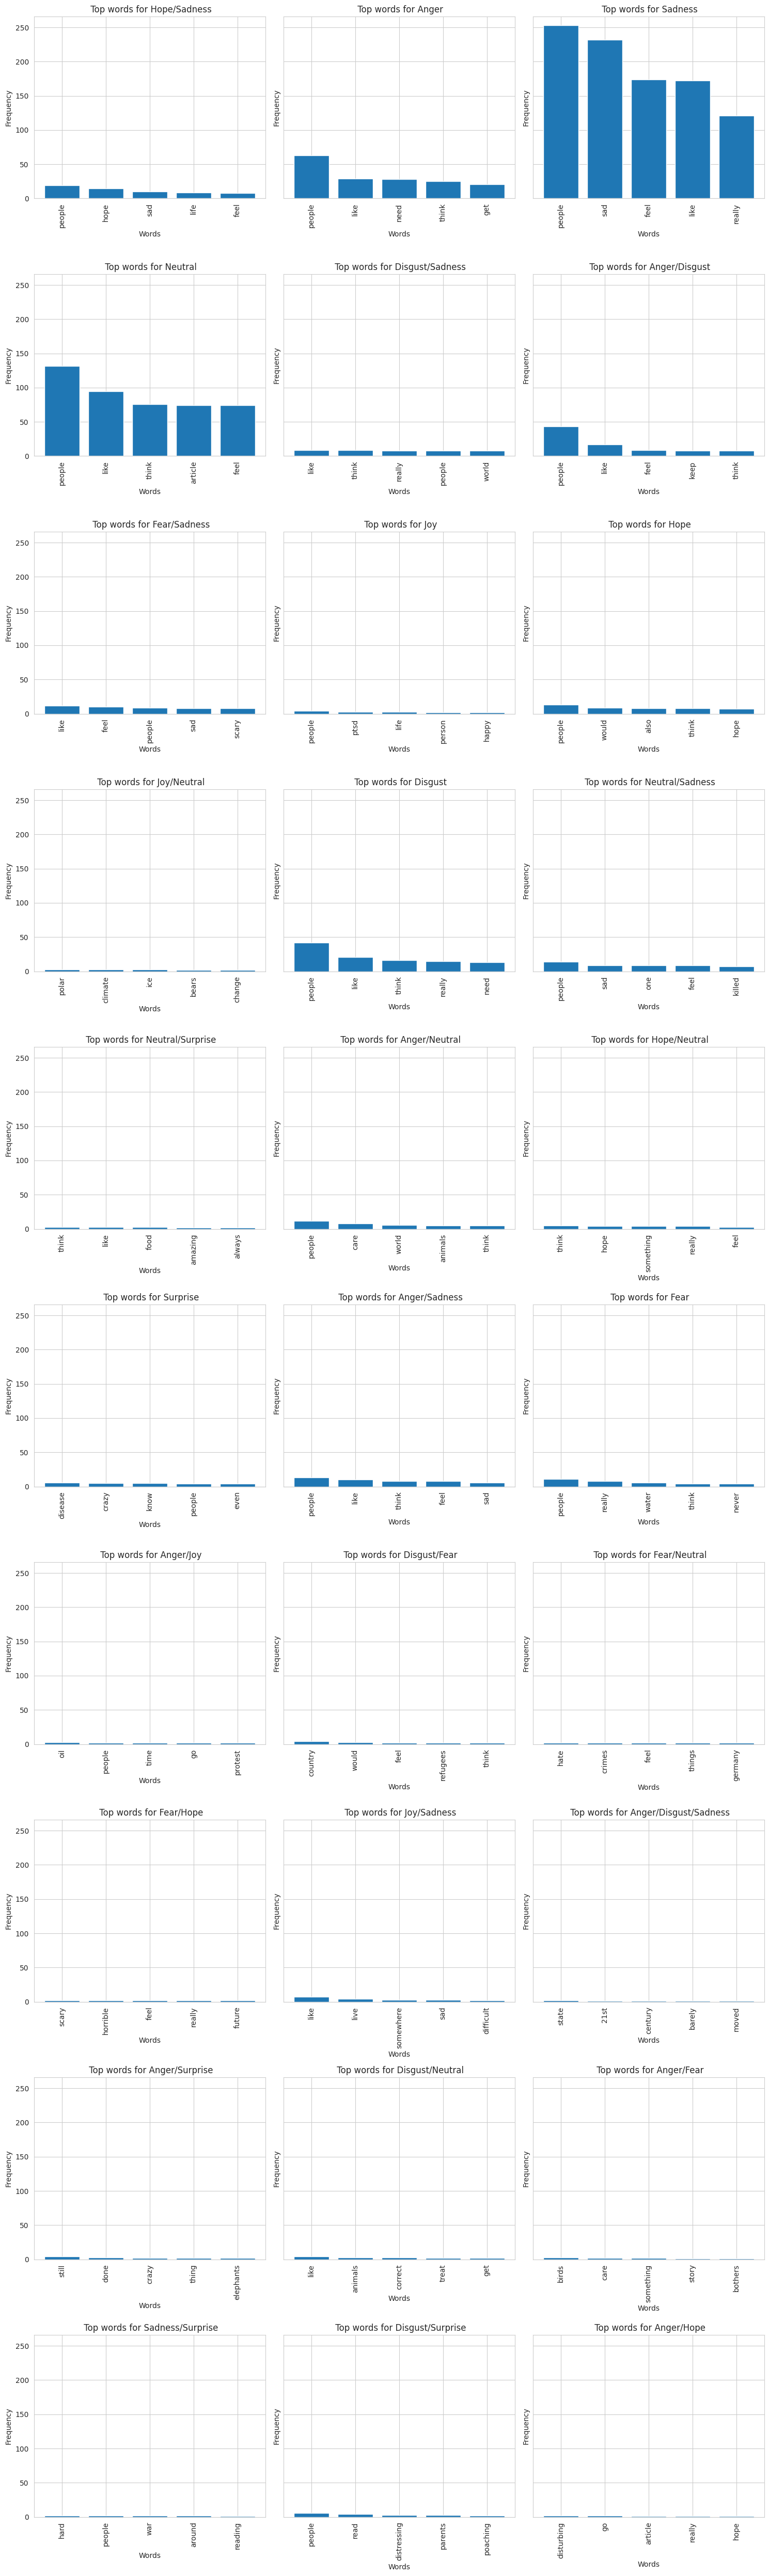

In [ ]:
#getting top words per emotion
def get_top_n_words_per_emotion(data, n=None, remove_stopwords=False, verb_only = False, obj_only=False):
    '''
    List the top n words per emotion.
    '''
    emotion_dict = {}
    
    #apply get_top_n_words to a subset of the dataset for each emotion
    for emotion in data['emotion'].unique():
        emotion_dict[emotion] = get_top_n_words(data[data['emotion'] == emotion]['essay'], n, remove_stopwords, verb_only=verb_only, obj_only=obj_only)
    return emotion_dict

#plotting the top 20 words per emotion
top_words_per_emotion = get_top_n_words_per_emotion(train_data, n=5, remove_stopwords=True)

#get number of emotions
num_plots = len(top_words_per_emotion)
#3 columns
num_cols = 3
#calculate number of rows
num_rows = num_plots // num_cols

#plot
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 50), sharey=True)
for idx, emotion in enumerate(top_words_per_emotion):
    x,y = map(list, zip(*top_words_per_emotion[emotion]))
    axes[idx // num_cols, idx % num_cols].bar(x,y)
    axes[idx // num_cols, idx % num_cols].set_title(f" Top words for {emotion}")
    axes[idx // num_cols, idx % num_cols].set_xlabel('Words')
    axes[idx // num_cols, idx % num_cols].set_ylabel('Frequency')
    axes[idx // num_cols, idx % num_cols].tick_params(axis='x', labelrotation=90)
fig.tight_layout()
    

## Top verbs per emotion

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['need', 'sha', 'win', 'would'] not in stop_words.
  warnings.warn(


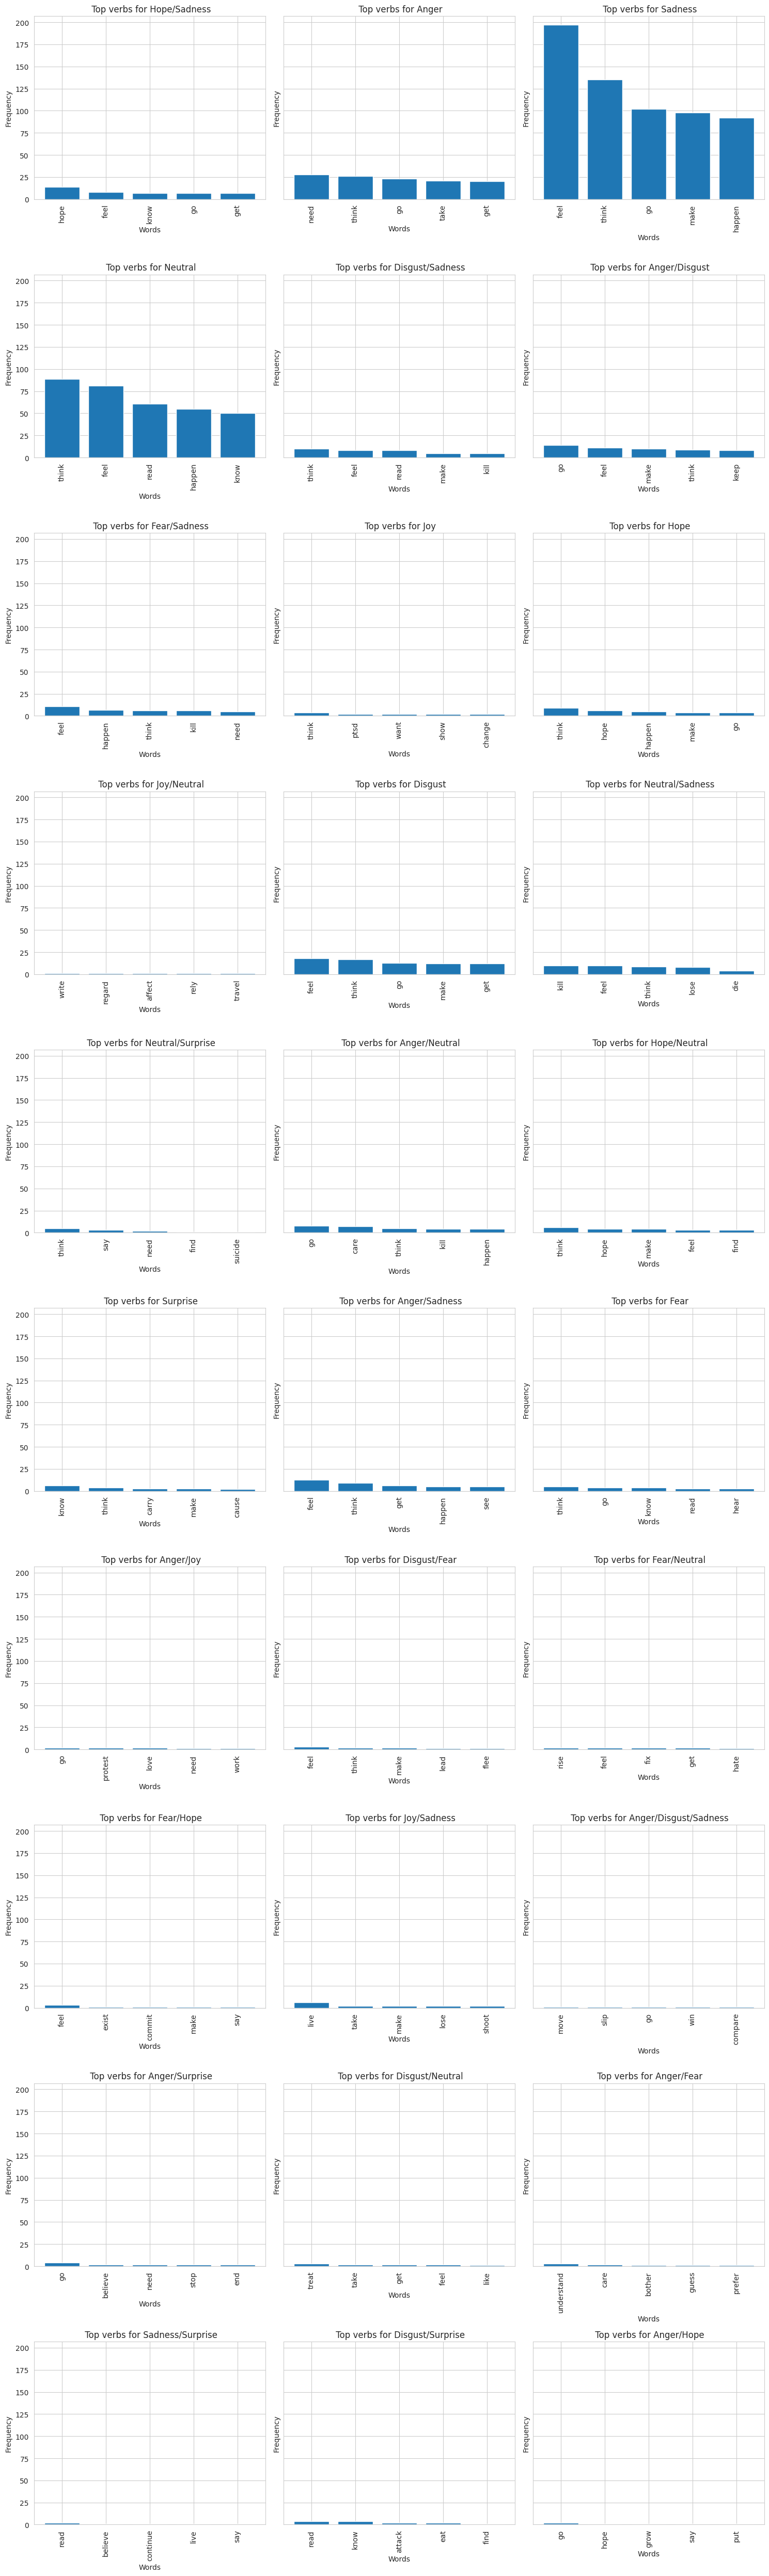

In [ ]:
#similar to above but only verbs
top_words_per_emotion = get_top_n_words_per_emotion(train_data, n=5, remove_stopwords=True, verb_only=True, obj_only=False)

num_plots = len(top_words_per_emotion)
num_cols = 3
num_rows = num_plots // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 50), sharey=True)
for idx, emotion in enumerate(top_words_per_emotion):
    x,y = map(list, zip(*top_words_per_emotion[emotion]))
    axes[idx // num_cols, idx % num_cols].bar(x,y)
    axes[idx // num_cols, idx % num_cols].set_title(f" Top verbs for {emotion}")
    axes[idx // num_cols, idx % num_cols].set_xlabel('Words')
    axes[idx // num_cols, idx % num_cols].set_ylabel('Frequency')
    axes[idx // num_cols, idx % num_cols].tick_params(axis='x', labelrotation=90)
fig.tight_layout()

## Top objects per emotion

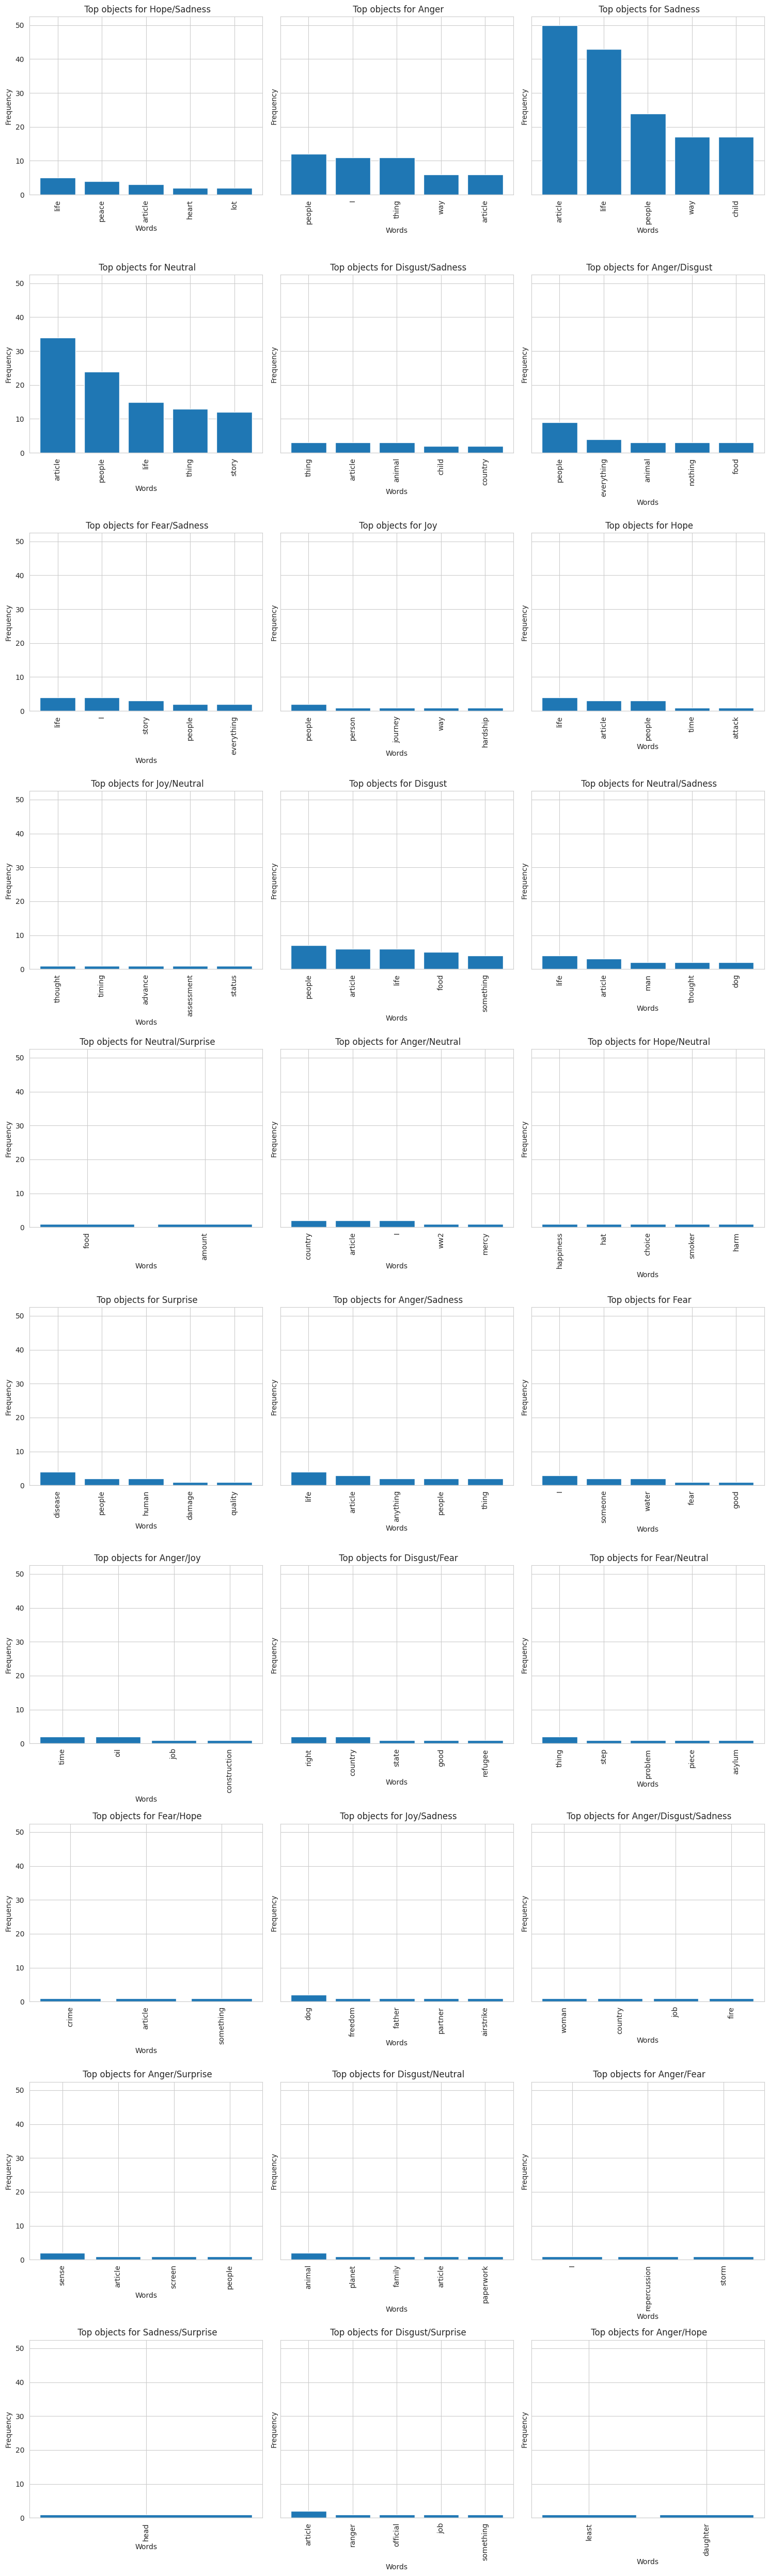

In [ ]:
#similar to above but only objects
top_words_per_emotion = get_top_n_words_per_emotion(train_data, n=5, remove_stopwords=True, verb_only=False, obj_only=True)

num_plots = len(top_words_per_emotion)
num_cols = 3
num_rows = num_plots // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 50), sharey=True)
for idx, emotion in enumerate(top_words_per_emotion):
    x,y = map(list, zip(*top_words_per_emotion[emotion]))
    axes[idx // num_cols, idx % num_cols].bar(x,y)
    axes[idx // num_cols, idx % num_cols].set_title(f" Top objects for {emotion}")
    axes[idx // num_cols, idx % num_cols].set_xlabel('Words')
    axes[idx // num_cols, idx % num_cols].set_ylabel('Frequency')
    axes[idx // num_cols, idx % num_cols].tick_params(axis='x', labelrotation=90)
fig.tight_layout()

# Baseline Bert Model for EMO Shared Task, WASSA 2023

In [ ]:
#import libraries
!pip install transformers
import pandas as pd
import numpy as np
import torch
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import PolynomialDecay
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils.class_weight import compute_class_weight, compute_sample_weight
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification, BartForConditionalGeneration, BartTokenizer, pipeline
from huggingface_hub import notebook_login
from tqdm.notebook import tqdm
tqdm.pandas()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 112.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 127.6 MB/s eta 0:00:00


In [ ]:
# Load data

#training data
data = pd.read_csv("WASSA23_essay_level_with_labels_train.tsv", sep="\t")
data = data[['emotion', 'essay']]

#development data
dev_data = pd.read_csv("WASSA23_essay_level_dev.tsv", sep="\t")

#gold standard dev labels
df = pd.read_csv('/content/goldstandard_dev.tsv', sep="\t", names=['1', '2', 'emotion',1,2,3,4,5,6,7,8,9])
dev_data['emotion'] = df['emotion']

In [ ]:
#Parameters for easy toggling
model_name='bert-base-uncased'
tokenizer_name = 'bert-base-uncased'
epochs=25

In [ ]:
#create a list of unique emotions
#unique_emotions = list(set(data["emotion"].str.split("/").explode().unique())) #uncomment to create a new sequence

#fixed sequence to account for saved model
unique_emotions = ['Disgust', 'Hope', 'Fear', 'Anger', 'Sadness', 'Joy', 'Surprise', 'Neutral']

unique_emotions

['Disgust', 'Hope', 'Fear', 'Anger', 'Sadness', 'Joy', 'Surprise', 'Neutral']

In [ ]:
#One Hot Encode the labels
num_classes = len(unique_emotions)
for emotion in unique_emotions:
    data[emotion] = data["emotion"].str.contains(emotion).astype(int)
    dev_data[emotion] = dev_data["emotion"].str.contains(emotion).astype(int)

#drop string emotion column
data = data.drop(columns=["emotion"])


In [ ]:
#get training and testing texts and labels
train_texts= data['essay'] 
train_labels = data[unique_emotions]
test_texts = dev_data['essay']
test_labels= dev_data[unique_emotions]

# Load tokenizer and pre-trained model
tokenizer = AutoTokenizer.from_pretrained(tokenizer_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_classes)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenize train and test texts
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True)
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True)

train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    train_labels.astype(np.float32)
))

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    test_labels.astype(np.float32)
))

In [ ]:
optimizer = tf.keras.optimizers.AdamW(learning_rate=2e-05)
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metric = tf.keras.metrics.BinaryAccuracy('accuracy')

# Compile model
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

#fit the model wit early stopping
early_stopping_callback = EarlyStopping(
      monitor="val_loss",
      patience=10,
      restore_best_weights=True
  )

#fit the model
history = model.fit(train_dataset.shuffle(len(train_labels)).batch(16), epochs=25, batch_size=16, validation_data=test_dataset.shuffle(len(test_labels)).batch(16), callbacks=[early_stopping_callback])

Epoch 1/25
50/50 [==============================] - 136s 897ms/step - loss: 0.4677 - accuracy: 0.8496 - val_loss: 0.3612 - val_accuracy: 0.8522
Epoch 2/25
50/50 [==============================] - 40s 795ms/step - loss: 0.3408 - accuracy: 0.8531 - val_loss: 0.3315 - val_accuracy: 0.8720
Epoch 3/25
50/50 [==============================] - 36s 720ms/step - loss: 0.3050 - accuracy: 0.8763 - val_loss: 0.2881 - val_accuracy: 0.8936
Epoch 4/25
50/50 [==============================] - 38s 770ms/step - loss: 0.2550 - accuracy: 0.9007 - val_loss: 0.2698 - val_accuracy: 0.9002
Epoch 5/25
50/50 [==============================] - 36s 713ms/step - loss: 0.2122 - accuracy: 0.9250 - val_loss: 0.2571 - val_accuracy: 0.9081
Epoch 6/25
50/50 [==============================] - 38s 754ms/step - loss: 0.1741 - accuracy: 0.9460 - val_loss: 0.2647 - val_accuracy: 0.9056
Epoch 7/25
50/50 [==============================] - 35s 707ms/step - loss: 0.1524 - accuracy: 0.9527 - val_loss: 0.2588 - val_accuracy: 0.906

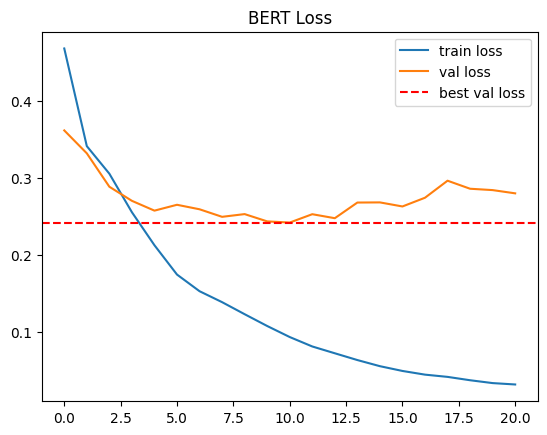

In [ ]:
#plot loss 
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')

#plot a line at the best loss
plt.axhline(np.min(history.history['val_loss']), linestyle='--', color='r', label='best val loss')
plt.title("BERT Loss")
plt.legend()


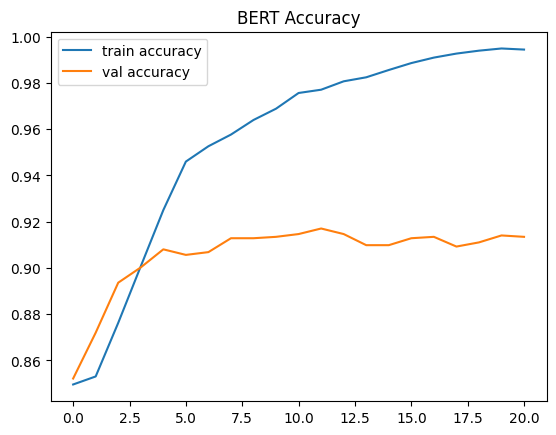

In [ ]:
#plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title("BERT Accuracy")
plt.legend()

In [ ]:
#finding the best threshold
def predict_on_test_dataset(test_dataset, thresholds):
  '''
    This function takes in the test dataset (here, dev data) and calculates F1 and accuracy. 
    Test different thresholds for logits
  '''

  #iterate over thresholds
  for threshold in thresholds:

    #predict using trained model
    y_pred = model.predict(test_dataset.batch(16))

    #based on threshold, convert logits to 1
    y_pred = tf.where(np.array(list(y_pred.logits)) > threshold, 1,0)
    y_pred = y_pred.numpy()
    y_true = test_labels.to_numpy()

    #calculate accuracy
    accuracy = np.sum(y_pred == y_true) / y_true.size

    #print accuracy and F1 macro
    print(threshold, f1_score(y_true, y_pred, average="macro",zero_division=1), accuracy)

#instantiate a list of thresholds
#thresholds = [i/80 for i in range(-6,0)]
thresholds = [-2]

#call the function
predict_on_test_dataset(test_dataset, thresholds)

13/13 [==============================] - 6s 215ms/step
-2 0.4602136292403562 0.8695913461538461


In [ ]:
#Get the string version of predictions
def get_predicted_emotions(data, threshold=-2):
    '''
      This function takes in the data and finds the emotion of the essay using the trained model
    '''

    #get the essay column
    essays = data['essay']

    #get the encodings
    encodings = tokenizer(essays.tolist(), truncation=True, padding=True)

    #create tensorflow dataset
    dataset = tf.data.Dataset.from_tensor_slices(dict(encodings))

    #get predictions
    y_pred = model.predict(dataset.batch(16))
    
    #create matrix based on threshold
    matrix = tf.where(y_pred.logits>threshold, 1, 0)
    y_pred = []

    #iterate over rows and find corresponding emotions
    for row in matrix:
      emotions = []
      for i in range(len(row)):
        if row[i] == 1:
          emotions.append(unique_emotions[i])
          emotions.sort()
      y_pred.append("/".join(emotions))

    #create a dataframe with the essays and the predicted emotions
    df = pd.DataFrame({'essay': essays, 'emotion': y_pred})

    #return the dataframe
    return df

In [ ]:
test_mode = True
if test_mode:
  dev_data = pd.read_csv("WASSA23_essay_level_test.tsv", sep="\t")


In [ ]:
#get predictions on the dev data
dev_predictions = get_predicted_emotions(dev_data)
dev_predictions

7/7 [==============================] - 4s 201ms/step


,essay,emotion
0,"hi my dear friend, how r you?. Are you use...",Neutral
1,The loss of human life is always a tragic even...,Sadness
2,"Hello mate, it's been a long time since I met ...",Neutral
3,us America and the security council adopts res...,Neutral
4,My thought was NATO and government forces are ...,Neutral
...,...,...
95,Check out this story. It is an outrage that so...,Anger/Disgust/Neutral
96,I just read a story about a person who was bro...,Neutral
97,I just read this article and it's really messe...,Disgust/Sadness
98,I just read about a man who is being deported ...,Sadness


In [ ]:
#if no emotion is assigned, assign neutral to that row
dev_predictions['emotion'] = dev_predictions['emotion'].replace('', 'Neutral')

In [ ]:
#save to csv
dev_predictions['emotion'].to_csv('predictions_EMO.tsv', sep="\t", header=False, index=False)

Macro F1-Score: 0.4409 \
Micro Recall: 0.6829 \
Micro Precision: 0.6774 \
Micro F1-Score: 0.6802 \
Macro Recall: 0.4458 \
Macro Precision: 0.4835 \
Micro Jaccard: 0.5153 \

# GoEmotions

In [ ]:
!pip install datasets
from datasets import load_dataset
import pandas as pd
dataset = load_dataset("go_emotions","raw")
df = pd.DataFrame(dataset['train'])
unique_emotions = ['text','disgust', 'optimism', 'fear', 'anger', 'sadness', 'joy', 'surprise', 'neutral']
df = df[unique_emotions]

df1 = df.rename({'text':'essay','disgust':'Disgust', 'optimism':'Hope', 'fear':'Fear', 'anger':'Anger', 'sadness':'Sadness', 'joy':"Joy", 'surprise':'Surprise', 'neutral':'Neutral'}, axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 5.2 MB/s eta 0:00:00


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/211225 [00:00<?, ? examples/s]

Dataset go_emotions downloaded and prepared to /root/.cache/huggingface/datasets/go_emotions/raw/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
unique_emotions = ['Disgust', 'Hope', 'Fear', 'Anger', 'Sadness', 'Joy', 'Surprise', 'Neutral']
unique_emotions
df2 = df1[df1[unique_emotions].sum(axis=1) != 0]

In [ ]:
df2.to_csv('goemotions.csv', index=False)

# Final Evaluation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support

def multi_label_metrics(y_true, y_pred, unique_labels):
    num_labels = len(unique_labels)
    
    # Calculate accuracy
    accuracy = np.sum(y_pred == y_true) / y_true.size

    # Calculate macro f1, macro precision, and macro recall
    macro_f1, macro_precision, macro_recall, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')

    # Initialize dictionaries for individual label metrics
    label_accuracy = {}
    label_f1 = {}
    label_precision = {}
    label_recall = {}

    # Calculate metrics for each individual label
    for i, label in enumerate(unique_labels):
        label_y_true = y_true[:, i]
        label_y_pred = y_pred[:, i]

        # Calculate label accuracy
        label_accuracy[label] = accuracy_score(label_y_true, label_y_pred)

        # Calculate label f1, precision, and recall
        label_f1[label], label_precision[label], label_recall[label], _ = precision_recall_fscore_support(label_y_true, label_y_pred, average='binary')

    # Create pandas DataFrame for individual label metrics
    df_label_metrics = pd.DataFrame({'Accuracy': label_accuracy,
                                     'F1': label_f1,
                                     'Precision': label_precision,
                                     'Recall': label_recall})

    return accuracy, macro_f1, macro_precision, macro_recall, df_label_metrics


In [ ]:
threshold = -2
y_pred = model.predict(test_dataset.batch(16))
y_pred = tf.where(np.array(list(y_pred.logits)) > threshold, 1,0)
y_pred = y_pred.numpy()
y_true = test_labels.to_numpy()

13/13 [==============================] - 3s 226ms/step


In [ ]:
accuracy, macro_f1, macro_precision, macro_recall, df_label_metrics = multi_label_metrics(y_true, y_pred, unique_emotions)

In [ ]:
df_label_metrics

,Accuracy,F1,Precision,Recall
Disgust,0.798077,0.339286,0.791667,0.475000
Hope,0.918269,0.461538,0.375000,0.413793
Fear,0.961538,0.500000,0.625000,0.555556
Anger,0.783654,0.442623,0.710526,0.545455
Sadness,0.802885,0.750000,0.891089,0.814480
Joy,0.985577,0.000000,0.000000,0.000000
Surprise,0.971154,0.000000,0.000000,0.000000
Neutral,0.774038,0.540230,0.870370,0.666667


In [ ]:
accuracy

0.8743990384615384

In [ ]:
macro_f1

0.37920962646266493

In [ ]:
macro_precision

0.5329565577171752

In [ ]:
macro_recall

0.43386868864176165

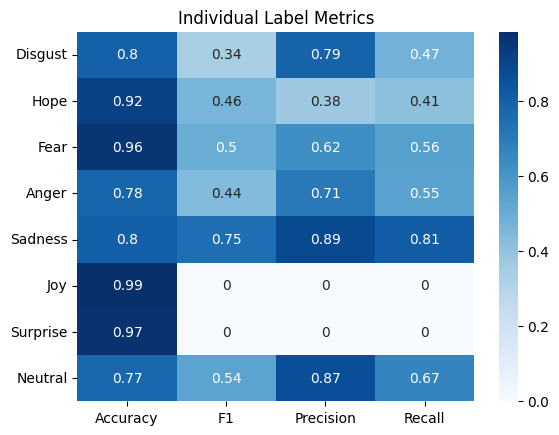

In [ ]:
import seaborn as sns
sns.heatmap(df_label_metrics, annot=True, cmap='Blues')
plt.title('Individual Label Metrics')
plt.show()

# RoBERTa metrics

Accuracy: 0.9194 \
F1:0.571 \
Precision: 0.6112\
Recall: 0.5726 \
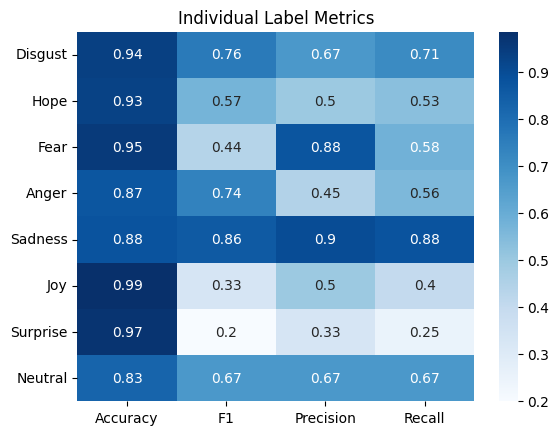


# BERT Metrics

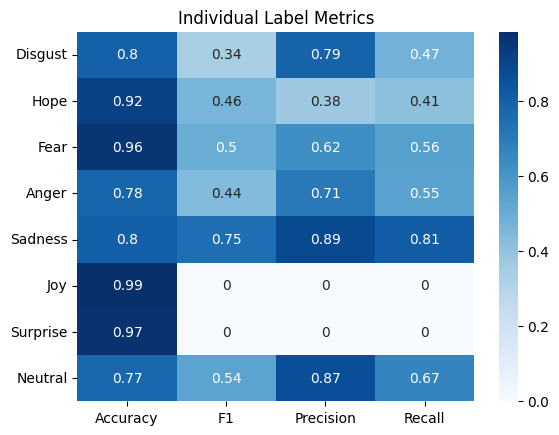